In [1]:
# ------------------------------------------
# TAXA DE CONVERSAO BRL/USD : 4.40
# ------------------------------------------
PTAX = 4.40

In [2]:
# ------------------------------------------
# python version - documentation
# ------------------------------------------
!python --version

Python 3.7.13


In [3]:
# ------------------------------------------
# modulos pip
# ------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# ------------------------------------------
# leitura das bases
# dataframe_D : moeda USD
# dataframe_R : moeda BRL
# ------------------------------------------
df_earnings_D = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/earnings-def.csv")
df_supply = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/supply-def.csv")
df_infos_gerais = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/infos-gerais-prov.csv")
df_attendance_rate = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/attendance-rate-def.csv")
df_incidentes_regras_rt = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/incidentes-regras-rt-def.csv")
df_ordens_done_cancel = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/ordens-done-cancel-def.csv")
df_product_return = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/product-return-prov.csv")
df_comp_defects = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/comp-defects-def.csv")
df_criacao_contas_churn = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/criacao-contas-churn-sem-duplicados-prov.csv")
df_tempo_resolucao_modal = pd.read_csv("/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/tempo-resolucao-modal-def.csv")

# Dataframe earnings

In [6]:
# ------------------------------------------
# DATAFRAME EARNINGS
# ------------------------------------------
# month: período mensal de ganhos do courier
# storekeeper_id: identificação do courier
# earnings: ganhos do courier no período
# tips: gorjetas do courier no período
# ------------------------------------------
df_earnings_D.head()

,MONTH,STOREKEEPER_ID,EARNINGS,TIPS
0,2021-07-01T00:00:00Z,33161,1047.82,316.0
1,2021-07-01T00:00:00Z,33189,916.58,304.0
2,2021-07-01T00:00:00Z,33194,3076.38,552.0
3,2021-07-01T00:00:00Z,33207,160.42,44.0
4,2021-07-01T00:00:00Z,33213,268.63,59.0


In [7]:
#------------------------------------
# Número de linhas e colunas
#------------------------------------

df_earnings_D.shape

(566099, 4)

In [8]:
# ------------------------------------------
# periodo dos dados: julho-21 a julho-22
# ------------------------------------------
df_earnings_D["MONTH"].unique()

array(['2021-07-01T00:00:00Z', '2021-08-01T00:00:00Z',
       '2021-09-01T00:00:00Z', '2021-10-01T00:00:00Z',
       '2021-11-01T00:00:00Z', '2021-12-01T00:00:00Z',
       '2022-01-01T00:00:00Z', '2022-02-01T00:00:00Z',
       '2022-03-01T00:00:00Z', '2022-04-01T00:00:00Z',
       '2022-05-01T00:00:00Z', '2022-06-01T00:00:00Z',
       '2022-07-01T00:00:00Z'], dtype=object)

In [9]:
# ------------------------------------------
# no periodo da amostra, passaram 180.107 
# couriers pela Rappi e o tempo de permanencia
# variou entre 1 e 13 meses
# ------------------------------------------
df_earnings_D["STOREKEEPER_ID"].value_counts()

1039063    13
176263     13
499419     13
114200     13
968792     13
           ..
1444232     1
1292838     1
1292978     1
1444216     1
1556765     1
Name: STOREKEEPER_ID, Length: 180107, dtype: int64

In [10]:
# ------------------------------------------
# como visto acima, o ID 1039063 permaneceu 
# na empresa pelos 13 meses da amostra
# CONCLUSAO : volume de EARNINGS flutuante 
# indica dados nao cumulativos
# ------------------------------------------
df_earnings_D.query("STOREKEEPER_ID == 1039063")

,MONTH,STOREKEEPER_ID,EARNINGS,TIPS
27501,2021-07-01T00:00:00Z,1039063,1057.03,313.0
77103,2021-08-01T00:00:00Z,1039063,1445.37,455.0
123805,2021-09-01T00:00:00Z,1039063,2616.20,613.0
165494,2021-10-01T00:00:00Z,1039063,3616.69,902.0
207544,2021-11-01T00:00:00Z,1039063,3098.46,641.0
247994,2021-12-01T00:00:00Z,1039063,3291.40,831.0
286759,2022-01-01T00:00:00Z,1039063,4531.22,1276.0
326887,2022-02-01T00:00:00Z,1039063,2611.26,700.0
369472,2022-03-01T00:00:00Z,1039063,2847.18,777.0
413730,2022-04-01T00:00:00Z,1039063,3703.83,984.0


In [11]:
# ------------------------------------------
# HIPOTESE: TENTAR FILTRAR OS COURIERS POR SAFRA MENSAL
# ------------------------------------------
jul21 = df_earnings_D["MONTH"].unique()[0]
ago21 = df_earnings_D["MONTH"].unique()[1]
set21 = df_earnings_D["MONTH"].unique()[2]
out21 = df_earnings_D["MONTH"].unique()[3]
nov21 = df_earnings_D["MONTH"].unique()[4]
dez21 = df_earnings_D["MONTH"].unique()[5]
jan22 = df_earnings_D["MONTH"].unique()[6]
fev22 = df_earnings_D["MONTH"].unique()[7]
mar22 = df_earnings_D["MONTH"].unique()[8]
abr22 = df_earnings_D["MONTH"].unique()[9]
mai22 = df_earnings_D["MONTH"].unique()[10]
jun22 = df_earnings_D["MONTH"].unique()[11]
jul22 = df_earnings_D["MONTH"].unique()[12]

In [12]:
# ------------------------------------------
# detalhe de ganhos e gorjetas mensais em reais
# ------------------------------------------
monthly_income_R = (df_earnings_D[["EARNINGS", "TIPS"]]*PTAX)
monthly_income_R["TOTAL"] = monthly_income_R.sum(axis=1)
monthly_income_R.describe()

,EARNINGS,TIPS,TOTAL
count,566099.000000,566099.000000,566099.000000
mean,2133.824794,454.300958,2588.125752
std,3872.064072,748.316498,4457.261964
min,0.000000,0.000000,1.276000
25%,122.628000,26.400000,151.580000
50%,662.816000,136.400000,819.984000
75%,2686.618000,576.400000,3319.910000
max,400972.000000,31741.600000,400972.000000


In [13]:
# ------------------------------------------
# ganho maximo do periodo : R$ 400k || US$ 91k
# id : 981377
# competencia: junho-22
# ------------------------------------------
max_income = monthly_income_R["EARNINGS"].max()/PTAX
df_earnings_D[df_earnings_D["EARNINGS"] == max_income]

,MONTH,STOREKEEPER_ID,EARNINGS,TIPS
499971,2022-06-01T00:00:00Z,981377,91130.0,0.0


In [14]:
# ------------------------------------------
# OUTLIERS UPPER-BOUND
# ------------------------------------------
renda_acima_20k = monthly_income_R[monthly_income_R["TOTAL"] > 20000].shape[0]
renda_acima_50k = monthly_income_R[monthly_income_R["TOTAL"] > 40000].shape[0]
renda_acima_100k = monthly_income_R[monthly_income_R["TOTAL"] > 100000].shape[0]
print(f"{renda_acima_20k} couriers tem renda acima de R$ 20.000")
print(f"{renda_acima_50k} couriers tem renda acima de R$ 50.000")
print(f"{renda_acima_100k} couriers tem renda acima de R$ 100.000")

4689 couriers tem renda acima de R$ 20.000
310 couriers tem renda acima de R$ 50.000
30 couriers tem renda acima de R$ 100.000


In [15]:
# ------------------------------------------
# remocao de outliers LOWER BOUND => abaixo de R$ 200 / mes
# remocao de outliers UPPER BOUND => a partir de R$ 20.000 / mes
# ------------------------------------------
# OBJETIVO : observar as estatísticas básicas de um courier padrao
#            media mensal : R$ 3.315
#            segundo quartil (mediana) : R$ 1.835
#            terceiro quartil : R$ 4.680
#            quarto quartil : R$ 20.000
# ------------------------------------------
# PROPOSTA: comparar padroes de comportamento entre os
# diferentes quartis e propor campanha de marketing interno
# ------------------------------------------
monthly_income_ex_outliers_R = monthly_income_R[monthly_income_R["TOTAL"] >= 200]
monthly_income_ex_outliers_R = monthly_income_ex_outliers_R[monthly_income_ex_outliers_R["TOTAL"] <= 20000]
monthly_income_ex_outliers_R.describe()

,EARNINGS,TIPS,TOTAL
count,398394.000000,398394.000000,398394.000000
mean,2717.605076,595.535361,3313.140437
std,3088.747147,711.735113,3692.148090
min,0.000000,0.000000,200.024000
25%,528.440000,105.600000,653.048000
50%,1486.584000,316.800000,1836.648000
75%,3790.677000,822.800000,4682.150000
max,19867.364000,14823.600000,19999.716000


In [16]:
# ------------------------------------------
# amostra nao possui dados nulos
# ------------------------------------------
monthly_income_R.isnull().sum()

EARNINGS    0
TIPS        0
TOTAL       0
dtype: int64

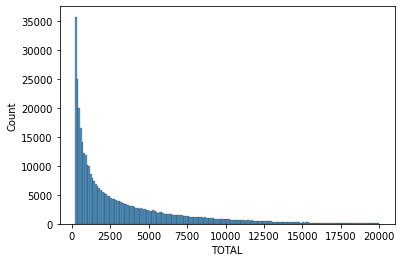

In [17]:
# ------------------------------------------
# visualizacao da distribuicao de rendimentos dos couriers ex-outliers
# ------------------------------------------
sns.histplot(
    data=monthly_income_ex_outliers_R,
    x="TOTAL",
    kde=False
)

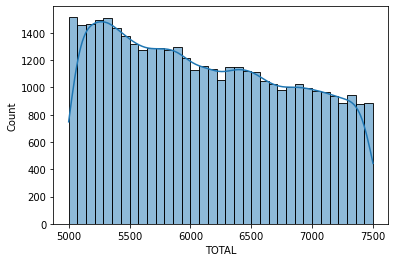

In [18]:
# ------------------------------------------
# HIPOTESE: sweet spot de renda: R$ 5.000 a R$ 7.500
# visualizacao da distribuicao de rendimentos no sweet spot
# ------------------------------------------
monthly_income_sweet_spot_R = monthly_income_R[monthly_income_R["TOTAL"] >= 5000]
monthly_income_sweet_spot_R = monthly_income_sweet_spot_R[monthly_income_sweet_spot_R["TOTAL"] <= 7500]

sns.histplot(
    data=monthly_income_sweet_spot_R,
    x="TOTAL",
    kde=True
)

In [19]:
# ------------------------------------------
# correlacao alta entre nivel de renda e ganhos com gorjetas
# method : pandas aceita métodos pearson, kendall e spearman
# ------------------------------------------
print(monthly_income_R[["EARNINGS", "TIPS"]].corr(method="pearson"))
print(monthly_income_R[["EARNINGS", "TIPS"]].corr(method="kendall"))
print(monthly_income_R[["EARNINGS", "TIPS"]].corr(method="spearman"))

          EARNINGS      TIPS
EARNINGS  1.000000  0.744484
TIPS      0.744484  1.000000
          EARNINGS      TIPS
EARNINGS  1.000000  0.778121
TIPS      0.778121  1.000000
          EARNINGS      TIPS
EARNINGS  1.000000  0.928498
TIPS      0.928498  1.000000


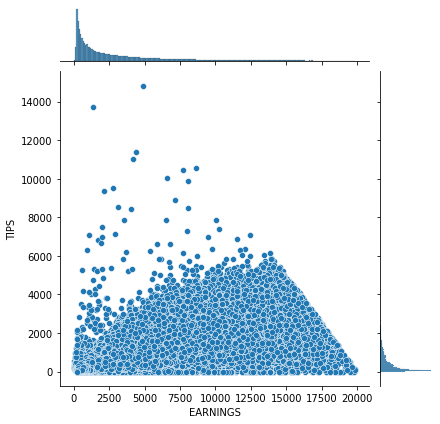

In [20]:
# ------------------------------------------
# jointplot permite explorar a relacao entre as variaveis
# ------------------------------------------
sns.jointplot(
    data=monthly_income_ex_outliers_R,
    x="EARNINGS",
    y="TIPS"
)

In [21]:
# df_earnings_jul22_D.head()

In [22]:
# df_criacao_contas_churn_sem_duplicado.head()

#Dataframe supply


In [ ]:
# ------------------------------------------
# DATAFRAME SUPPLY
# ------------------------------------------
# created_card: data de criacao do cartao
# have_card: bool
# num_orders: periodo diario
# supply_hours: periodo diario
# ------------------------------------------
df_supply.head()

,CITY,DATE,WEEK,CREATED_CARD,STOREKEEPER_ID,LEVEL_NAME_2,HAVE_CARD,TRANSPORT_MEDIA_TYPE,NUM_ORDERS,SUPPLY_HOURS
0,Grande São Paulo,2022-07-26,2022-07-25,2020-07-06,794243,diamond,1,bicycle,13.0,9.313611
1,Grande São Paulo,2022-07-26,2022-07-25,NaN,1000778,diamond,0,bicycle,9.0,11.497500
2,Rio de Janeiro,2022-07-26,2022-07-25,2022-04-01,117036,diamond,1,bicycle,9.0,16.656111
3,Rio de Janeiro,2022-07-26,2022-07-25,2022-05-12,1489979,diamond,1,bicycle,1.0,10.286667
4,Grande São Paulo,2022-07-26,2022-07-25,2022-03-28,867378,diamond,1,motorbike,3.0,3.426944


In [ ]:
#------------------------------
# Número de linhas e colunas
#------------------------------

df_supply.shape

(124526, 10)

In [ ]:
# ------------------------------------------
# id do biggest-earner do periodo nao esta
# cadastrado na base de dados
# ------------------------------------------
df_supply[df_supply["STOREKEEPER_ID"] == 981377]

,CITY,DATE,WEEK,CREATED_CARD,STOREKEEPER_ID,LEVEL_NAME_2,HAVE_CARD,TRANSPORT_MEDIA_TYPE,NUM_ORDERS,SUPPLY_HOURS


In [ ]:
# ------------------------------------------
# periodo dos dados: 28-junho-22 a 26-julho-22
# ------------------------------------------
df_supply["DATE"].unique()

array(['2022-07-26', '2022-07-25', '2022-07-24', '2022-07-23',
       '2022-07-22', '2022-07-21', '2022-07-20', '2022-07-19',
       '2022-07-18', '2022-07-17', '2022-07-16', '2022-07-15',
       '2022-07-14', '2022-07-13', '2022-07-12', '2022-07-11',
       '2022-07-10', '2022-07-09', '2022-07-08', '2022-07-07',
       '2022-07-06', '2022-07-05', '2022-07-04', '2022-07-03',
       '2022-07-02', '2022-07-01', '2022-06-30', '2022-06-29',
       '2022-06-28'], dtype=object)

In [ ]:
# ------------------------------------------
# principais cidades de atuacao da Rappi
# PROPOSTA: focar reducao do churn nessas cidades
# ------------------------------------------
df_supply["CITY"].value_counts(normalize=True).head()

Grande São Paulo    0.514776
Rio de Janeiro      0.149077
Belo Horizonte      0.060044
Curitiba            0.034965
Fortaleza           0.031664
Name: CITY, dtype: float64

In [ ]:
# ------------------------------------------
# niveis de courier: diamante (80%), prata (15%), bronze (5%)
# HIPOTESE: maior segmentacao poderia tornar mais obvios
# os padroes de comportamento que resultam em maior remuneracao
# e aumentar o engajamento dos couriers na plataforma
# FATO: piramide esta invertida
# ------------------------------------------
df_supply["LEVEL_NAME_2"].value_counts(normalize=True)

diamond    0.777377
silver     0.182207
bronze     0.035455
danger     0.004960
Name: LEVEL_NAME_2, dtype: float64

In [ ]:
# ------------------------------------------
# modais de entrega: moto (40%), bike (30%), carro (30%)
# PROPOSTA: segmentar a tabela EARNINGS com base no modal do entregador
# HIPOTESE: o modal impacta os rendimentos e propensao a churn?
# ------------------------------------------
df_supply["TRANSPORT_MEDIA_TYPE"].value_counts(normalize=True)

motorbike    0.410830
bicycle      0.307719
car          0.281451
Name: TRANSPORT_MEDIA_TYPE, dtype: float64

#Dataframe Infos Gerais

In [ ]:
# ------------------------------------------
# DATAFRAME INFOS GERAIS
# ------------------------------------------
df_infos_gerais.head()

,ID,NOME,SOBRENOME,GENERO,DATA_NASCIMENTO,CIDADE,IS_ACTIVE,TRANSPORTE,AUTO_ACEITE,COUNT_ORDERS_LAST_7D,...,ULTIMO_PEDIDO,COUNT_ORDERS_RESTAURANTES,COUNT_ORDERS_MERCADO,COUNT_ORDERS_FARMACIA,COUNT_ORDERS_EXPRESS,COUNT_ORDERS_ECOMMERCE,COUNT_ORDERS_ANTOJO,FRETE_MEDIO,COOKING_TIME_MEDIO,ITENS_MEDIO
0,1561246,Wilton Jhonne,Da Silva Abreu,M,1988-04-21,Sao Paulo,True,motorbike,True,1,...,2022-08-01T00:00:00Z,1,0,0,0,0,0,62.255500,10.000000,1.00
1,1561210,Dennis Leonardo,Pereira Santos,M,1998-06-28,Grande São Paulo,True,motorbike,True,7,...,2022-08-01T00:00:00Z,6,1,0,0,0,0,43.444714,23.142857,3.00
2,1561205,Thavillo Teles,Balviano De Olivetra,M,1997-09-25,Natal,True,motorbike,True,2,...,2022-08-01T00:00:00Z,1,1,0,0,0,0,42.230500,4.500000,3.50
3,1561173,Evellyn Dos,Santos Massal,F,1994-07-21,Grande São Paulo,True,motorbike,True,4,...,2022-08-01T00:00:00Z,4,0,0,0,0,0,47.236750,7.250000,1.25
4,1561132,Ewerlyn Vanessa,Dos Santos Borges,F,1999-06-15,Campinas,True,motorbike,False,4,...,2022-08-01T00:00:00Z,1,0,0,1,0,0,32.774250,2.000000,4.50


In [ ]:
#-------------------------------
# Número de linhas e colunas
#-------------------------------
df_infos_gerais.shape

(180178, 25)

In [ ]:
# ------------------------------------------
# detalhe sobre as colunas do dataframe
# ------------------------------------------
df_infos_gerais.columns

Index(['ID', 'NOME', 'SOBRENOME', 'GENERO', 'DATA_NASCIMENTO', 'CIDADE',
       'IS_ACTIVE', 'TRANSPORTE', 'AUTO_ACEITE', 'COUNT_ORDERS_LAST_7D',
       'COUNT_ORDERS_LAST_30D', 'COUNT_ORDERS_CANCELED_LAST_7D',
       'COUNT_ORDERS_CANCELED_LAST_30D', 'GORJETA', 'PRIMEIRO_PEDIDO',
       'ULTIMO_PEDIDO', 'COUNT_ORDERS_RESTAURANTES', 'COUNT_ORDERS_MERCADO',
       'COUNT_ORDERS_FARMACIA', 'COUNT_ORDERS_EXPRESS',
       'COUNT_ORDERS_ECOMMERCE', 'COUNT_ORDERS_ANTOJO', 'FRETE_MEDIO',
       'COOKING_TIME_MEDIO', 'ITENS_MEDIO'],
      dtype='object')

In [ ]:
# ------------------------------------------
# couriers do sexo masculino: 7-em-8
# couriers do sexo feminino: 1-em-8
# ------------------------------------------
df_infos_gerais["GENERO"].value_counts(normalize=True)

M    0.877123
F    0.122017
O    0.000860
Name: GENERO, dtype: float64

In [ ]:
# ------------------------------------------
# 7-em-8 dos couriers ativos nao executaram 
# nenhuma entrega nos ultimos 7 dias
# ------------------------------------------
df_infos_gerais[df_infos_gerais["IS_ACTIVE"] == True]["COUNT_ORDERS_LAST_7D"].value_counts(normalize=True)

0      0.860646
1      0.017686
2      0.011413
3      0.008554
4      0.006880
         ...   
228    0.000006
198    0.000006
129    0.000006
229    0.000006
169    0.000006
Name: COUNT_ORDERS_LAST_7D, Length: 211, dtype: float64

In [ ]:
# ------------------------------------------
# 3-em-4 dos couriers ativos nao executaram 
# nenhuma entrega nos ultimos 30 dias
# ------------------------------------------
df_infos_gerais[df_infos_gerais["IS_ACTIVE"] == True]["COUNT_ORDERS_LAST_30D"].value_counts(normalize=True)

0       0.765975
1       0.027069
2       0.016841
3       0.012480
4       0.009766
          ...   
820     0.000006
590     0.000006
542     0.000006
1192    0.000006
629     0.000006
Name: COUNT_ORDERS_LAST_30D, Length: 624, dtype: float64

In [ ]:
# ------------------------------------------
# id do biggest-earner do periodo nao esta
# cadastrado na base de dados
# ------------------------------------------
df_infos_gerais[df_infos_gerais["ID"] == 981377]

,ID,NOME,SOBRENOME,GENERO,DATA_NASCIMENTO,CIDADE,IS_ACTIVE,TRANSPORTE,AUTO_ACEITE,COUNT_ORDERS_LAST_7D,...,ULTIMO_PEDIDO,COUNT_ORDERS_RESTAURANTES,COUNT_ORDERS_MERCADO,COUNT_ORDERS_FARMACIA,COUNT_ORDERS_EXPRESS,COUNT_ORDERS_ECOMMERCE,COUNT_ORDERS_ANTOJO,FRETE_MEDIO,COOKING_TIME_MEDIO,ITENS_MEDIO


#Dataframe Attendance Rate

In [ ]:
# ------------------------------------------
# DATAFRAME ATTENDANCE RATE
# Taxa de aceitação dos pedidos, ex 9-out-of-10 == 90%
# ------------------------------------------
df_attendance_rate.head()

,STOREKEEPER_ID,ACCEPTANCE_RATE
0,907442.0,0.666102
1,1393441.0,0.556538
2,1061798.0,0.777838
3,103460.0,0.160980
4,1259998.0,0.856102


In [ ]:
#------------------------------------------
# Número de linhas e colunas
#------------------------------------------

df_attendance_rate.shape

(653167, 2)

In [ ]:
# ------------------------------------------
# 60% dos campos do dataframe não estão preenchidos
# ------------------------------------------
df_attendance_rate["ACCEPTANCE_RATE"].isnull().value_counts(normalize=True)

True     0.597268
False    0.402732
Name: ACCEPTANCE_RATE, dtype: float64

#Dataframe Incidentes regras

In [ ]:
#------------------------------------
# DATAFRAME INCIDENTES_REGRAS
#------------------------------------

df_incidentes_regras_rt.head()

,DATE,NAME,INCIDENT_ID,STOREKEEPER_ID,PUNISHMENT_MINUTES,PUNISHMENT_TYPE,DISCIPLINE_RULE_BUCKET,CATEGORY_RULE,ORDER_ID
0,2022-06-29,92. Liberación (Live),7834134,1089595,15,temporary_block,release_live,Discipline,148929241.0
1,2021-10-11,75. Reporte Manual Casos MUITO GRAVES - Bloque...,6262418,1379883,21600000,permanent_block,Manual,Manual,117857596.0
2,2022-06-15,92. Liberación (Live),7729462,1445261,300,temporary_block,release_live,Discipline,147335512.0
3,2021-08-29,Liberacion CMS (live) - 60 min\t,6111307,246044,0,warning,Discipline,Discipline,112916271.0
4,2022-01-08,92. Liberación (Live),6812562,1392515,0,warning,release_live,Discipline,128363332.0


In [ ]:
df_incidentes_regras_rt.shape

(2405601, 9)

#Dataframe Ordens Done e Cancel

In [ ]:
# ------------------------------------------
# DATAFRAME ORDENS DON CANCEL
# ------------------------------------------

df_ordens_done_cancel.head()

,STOREKEEPER_ID,ORDERS_DONE,ORDERS_CANCEL,CANCELS_OPS_RT
0,266155,10356,61,0
1,166971,10272,112,4
2,2144,9915,123,0
3,242848,9833,28,8
4,70511,9814,229,64


In [ ]:
df_ordens_done_cancel.shape

(653166, 4)

#Dataframe Product Return

In [ ]:
#-------------------------------
# DATAFRAME PRODUCT RETURN
#-------------------------------

df_product_return.head()

,ID_ENTREGADOR,LEVEL_NAME,MODAL,CITY,CREATED_AT,ORDER_ID,PRODUCT_RETURNS,VERTICAL_SUB_GROUP,COUNT_TO_GMV,GMV,STORE_ID
0,1522020,rookie,bicycle,Grande São Paulo,2022-06-30T01:20:28-05:00,148999124,-39.707,PHARMACY,False,0.000000,900621879
1,625622,diamond,bicycle,Grande São Paulo,2022-06-29T23:16:11-05:00,148997023,-12.455,PHARMACY,True,16.813483,900170876
2,841749,silver,bicycle,Natal,2022-06-29T22:07:59-05:00,148992350,-7.702,LIQUOR,True,3.017978,900269581
3,1452571,diamond,bicycle,Rio de Janeiro,2022-06-29T21:32:35-05:00,148988385,-11.354,LIQUOR,True,9.865169,900028478
4,556293,bronze,bicycle,Rio de Janeiro,2022-06-29T20:58:59-05:00,148983574,-8.084,SUPER,True,13.364045,900014202


In [ ]:
#----------------------------
# Número de linhas e colunas
#----------------------------

df_product_return.shape

(41535, 11)

#Dataframe Comp Defects

In [ ]:
#-----------------------------
# DATAFRAME COMP DEFECTS
#-----------------------------

df_comp_defects.head()

,STOREKEEPER_ID,WEEK,CITY,LEVEL_ID,LEVEL_NAME,ORDERS,GMV_TOTAL,COMPENSATIONS,DEFECT_COMPENSATIONS,DEFECT_ORDER
0,1009854.0,2021-07-17,Grande São Paulo,3.0,bronze,5,422.48,11.173,108019818.0,108019818.0
1,822496.0,2022-01-19,Grande São Paulo,3.0,bronze,5,947.92,1.751,129571770.0,129571770.0
2,1404796.0,2022-05-23,Grande São Paulo,1.0,diamond,3,467.78,7.681,144664666.0,144664666.0
3,33564.0,2022-04-15,Grande São Paulo,1.0,diamond,26,2655.90,0.634,140114780.0,140114780.0
4,1477795.0,2022-04-24,Grande São Paulo,4.0,danger,25,4689.84,8.724,141097167.0,141097167.0


In [ ]:
#----------------------------
# Número de linhas e colunas
#----------------------------

df_comp_defects.shape

(6783958, 10)

In [ ]:
#---------------------------------
# ANÁLISE EXPLORATÓRIA INFOS_GERAIS
#---------------------------------

In [ ]:
#Print da planilha
df_infos_gerais

,ID,NOME,SOBRENOME,GENERO,DATA_NASCIMENTO,CIDADE,IS_ACTIVE,TRANSPORTE,AUTO_ACEITE,COUNT_ORDERS_LAST_7D,...,ULTIMO_PEDIDO,COUNT_ORDERS_RESTAURANTES,COUNT_ORDERS_MERCADO,COUNT_ORDERS_FARMACIA,COUNT_ORDERS_EXPRESS,COUNT_ORDERS_ECOMMERCE,COUNT_ORDERS_ANTOJO,FRETE_MEDIO,COOKING_TIME_MEDIO,ITENS_MEDIO
0,1561246,Wilton Jhonne,Da Silva Abreu,M,1988-04-21,Sao Paulo,True,motorbike,True,1,...,2022-08-01T00:00:00Z,1,0,0,0,0,0,62.255500,10.000000,1.000000
1,1561210,Dennis Leonardo,Pereira Santos,M,1998-06-28,Grande São Paulo,True,motorbike,True,7,...,2022-08-01T00:00:00Z,6,1,0,0,0,0,43.444714,23.142857,3.000000
2,1561205,Thavillo Teles,Balviano De Olivetra,M,1997-09-25,Natal,True,motorbike,True,2,...,2022-08-01T00:00:00Z,1,1,0,0,0,0,42.230500,4.500000,3.500000
3,1561173,Evellyn Dos,Santos Massal,F,1994-07-21,Grande São Paulo,True,motorbike,True,4,...,2022-08-01T00:00:00Z,4,0,0,0,0,0,47.236750,7.250000,1.250000
4,1561132,Ewerlyn Vanessa,Dos Santos Borges,F,1999-06-15,Campinas,True,motorbike,False,4,...,2022-08-01T00:00:00Z,1,0,0,1,0,0,32.774250,2.000000,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180173,33188,Clodoaldo,Raimundo da Silva,M,1969-11-28,Grande São Paulo,True,motorbike,False,0,...,2021-11-03T00:00:00Z,10,0,1,1,0,0,50.107000,28.076923,4.307692
180174,33161,Sandro,Pimentel dos Santos,M,1973-05-21,Grande São Paulo,True,motorbike,False,0,...,2022-07-05T00:00:00Z,788,50,68,28,16,37,41.449023,17.515435,3.281572
180175,33052,Aroldo,Ferreira Neto,M,1971-08-02,Grande São Paulo,True,motorbike,False,0,...,2021-12-19T00:00:00Z,0,0,0,0,0,0,35.644500,28.000000,2.000000
180176,33051,Willian,Justino,M,1997-05-18,Grande São Paulo,True,bicycle,True,0,...,2022-03-23T00:00:00Z,394,81,161,63,23,8,33.712545,11.650307,4.215951


In [ ]:
df_criacao_contas_churn.head(2)

,Unnamed: 0,ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,0,1286316,Adailton,M,Grande São Paulo,2021-06-07,motorbike,True,bronze,2022-01-16T23:27:35Z
1,1,1110698,Adriano Floriano Da Silva,M,Recife,2021-02-11,bicycle,True,bronze,2021-07-15T11:16:04Z


In [ ]:
df_test1 = df_criacao_contas_churn['ID'].nunique()

In [ ]:
df_test1

152224

In [ ]:
df_criacao_contas_churn['ID'].value_counts()

1286316    1
1411342    1
404671     1
1419786    1
1204431    1
          ..
327476     1
168232     1
85047      1
905594     1
1457568    1
Name: ID, Length: 152224, dtype: int64

In [ ]:
df_criacao_contas_churn.query('ID == 76238')

,Unnamed: 0,ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
732,746,76238,Ricardo,M,Diadema,2018-11-05,car,True,bronze,2022-02-22T12:01:37Z


In [ ]:
df_criacao_contas_churn_sem_duplicado = pd.read_csv('/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/criacao-contas-churn-sem-duplicados.csv')

In [ ]:
df_criacao_contas_churn_sem_duplicado

,Unnamed: 0,ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,0,1286316,Adailton,M,Grande São Paulo,2021-06-07,motorbike,True,bronze,2022-01-16T23:27:35Z
1,1,1110698,Adriano Floriano Da Silva,M,Recife,2021-02-11,bicycle,True,bronze,2021-07-15T11:16:04Z
2,2,284886,Bruno,M,Grande São Paulo,2019-07-03,motorbike,False,bronze,2021-07-07T12:33:21Z
3,3,1036587,Vinicius,M,Paulínia,2020-12-21,motorbike,True,bronze,2021-09-12T16:45:27Z
4,4,106854,Eduardo,M,Grande São Paulo,2019-02-11,motorbike,True,bronze,2021-11-14T13:45:57Z
...,...,...,...,...,...,...,...,...,...,...
152219,32568379,1372362,Jônatas,M,Natal,2021-09-25,motorbike,False,rookie,2021-10-31T19:39:37Z
152220,32568380,1503585,Daniel,M,Curitiba,2022-04-26,bicycle,False,rookie,2022-04-28T18:42:44Z
152221,32568381,1399642,Fernando,M,Grande São Paulo,2021-11-17,motorbike,False,rookie,2021-11-24T08:45:52Z
152222,32568382,1373182,Marcelo,M,Paulínia,2021-09-26,motorbike,True,rookie,2021-10-01T17:27:49Z


In [ ]:
df_tempo_resolucao_modal.shape

(1889002, 11)

In [ ]:
df_distance = pd.read_csv('/content/drive/Shareddrives/grupo4-rappi-hour/bases-rappi/2022-08-10 10_40am.csv')
df_distance

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORDER_ID,STOREKEEPER_ID,DISTANCE_TO_USER,BUNDLE_ID
0,117818357,NaN,2.315865,NaN
1,147728554,NaN,2.584614,NaN
2,147959308,NaN,3.641370,NaN
3,112947154,NaN,2.258829,NaN
4,129226705,NaN,2.739550,NaN
...,...,...,...,...
31382210,128962444,1208502.0,0.499839,NaN
31382211,107665980,406117.0,2.398273,NaN
31382212,110061059,239773.0,0.997030,NaN
31382213,135040280,1223363.0,1.222013,NaN


#Hipóteses

In [ ]:
#Quantas horas cada entregador ficou ativo no mês de julho de 2022

df_supply_sum = df_supply.groupby(by='STOREKEEPER_ID').sum()
df_supply_sum

,HAVE_CARD,NUM_ORDERS,SUPPLY_HOURS
STOREKEEPER_ID,,,
33203,15,52.0,84.643611
33355,25,152.0,221.952778
33564,23,177.0,137.750833
33737,9,33.0,20.955278
34420,21,244.0,145.343333
...,...,...,...
1538876,0,41.0,85.021945
1539013,0,0.0,1.143889
1539017,7,29.0,39.773889


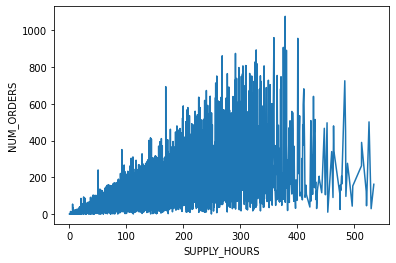

In [ ]:
#Relação entre horas ativas e pedidos no mês de julho de 2022

sns.lineplot(data=df_supply_sum, x='SUPPLY_HOURS', y='NUM_ORDERS')

In [ ]:
#Earnings do mês de Julho de 2022

df_earnings_jul22_D = df_earnings_D.query('MONTH == "2022-07-01T00:00:00Z"')
df_earnings_jul22_D

,MONTH,STOREKEEPER_ID,EARNINGS,TIPS
527391,2022-07-01T00:00:00Z,33161,34.65,3.0
527392,2022-07-01T00:00:00Z,33194,2137.28,103.0
527393,2022-07-01T00:00:00Z,33203,289.34,202.0
527394,2022-07-01T00:00:00Z,33263,4224.88,421.0
527395,2022-07-01T00:00:00Z,33266,123.98,43.0
...,...,...,...,...
566094,2022-07-01T00:00:00Z,1556676,32.14,3.0
566095,2022-07-01T00:00:00Z,1556681,10.73,3.0
566096,2022-07-01T00:00:00Z,1556689,19.50,2.0
566097,2022-07-01T00:00:00Z,1556714,30.04,4.0


In [ ]:
# merge das bases de earnings e supply referente ao mês de julho de 2022
df_supply_sum_earnings_jul22 = df_supply_sum.merge(df_earnings_jul22_D, left_on='STOREKEEPER_ID', right_on='STOREKEEPER_ID')
df_supply_sum_earnings_jul22

,STOREKEEPER_ID,HAVE_CARD,NUM_ORDERS,SUPPLY_HOURS,MONTH,EARNINGS,TIPS
0,33203,15,52.0,84.643611,2022-07-01T00:00:00Z,289.34,202.0
1,33355,25,152.0,221.952778,2022-07-01T00:00:00Z,1146.04,247.0
2,33564,23,177.0,137.750833,2022-07-01T00:00:00Z,1669.12,414.0
3,33737,9,33.0,20.955278,2022-07-01T00:00:00Z,155.15,48.0
4,34420,21,244.0,145.343333,2022-07-01T00:00:00Z,1769.29,518.0
...,...,...,...,...,...,...,...
6312,1538857,0,21.0,45.545000,2022-07-01T00:00:00Z,199.80,53.0
6313,1538876,0,41.0,85.021945,2022-07-01T00:00:00Z,479.72,57.0
6314,1539017,7,29.0,39.773889,2022-07-01T00:00:00Z,288.34,65.0
6315,1539162,27,59.0,152.770833,2022-07-01T00:00:00Z,237.96,97.0


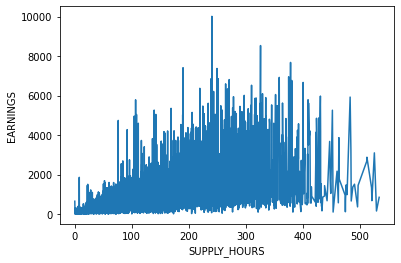

In [ ]:
#Relação entre Earnings e horas ativas 

sns.lineplot(data=df_supply_sum_earnings_jul22, x='SUPPLY_HOURS', y='EARNINGS')

Pode-se perceber que os earnings mantém um crescimento quase constante, se excluir alguns outliers, 

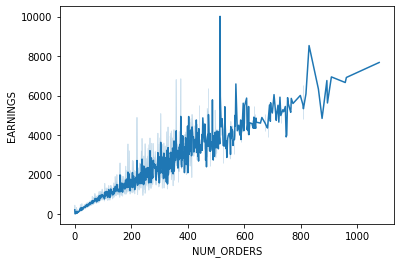

In [ ]:
#Relação de earnings e núemro de pedidos

supply_earnings_lineplot = sns.lineplot(data=df_supply_sum_earnings_jul22, x='NUM_ORDERS', y='EARNINGS')

In [ ]:
# Merge das bases de Earnings, Supply e churn

df_supply_sum_earnings_churns_jul22 = df_supply_sum_earnings_jul22.merge(df_criacao_contas_churn, left_on='STOREKEEPER_ID', right_on='ID')
df_supply_sum_earnings_churns_jul22

,STOREKEEPER_ID,HAVE_CARD,NUM_ORDERS,SUPPLY_HOURS,MONTH,EARNINGS,TIPS,Unnamed: 0,ID,FIRST_NAME,GENDER,CITY,SK.CREATED_AT::DATE,TRANSPORT_MEDIA_TYPE,CARTAO,LEVEL_NAME,FECHA_ULT
0,76831,4,34.0,18.001111,2022-07-01T00:00:00Z,209.82,40.0,10518,76831,Eudes,M,Grande São Paulo,2018-11-07,motorbike,True,diamond,2022-07-02T19:04:09Z
1,129707,2,11.0,7.420556,2022-07-01T00:00:00Z,110.37,24.0,24144,129707,Gustavo,M,Grande São Paulo,2019-03-15,motorbike,True,diamond,2022-07-02T17:11:43Z
2,141195,5,46.0,33.384444,2022-07-01T00:00:00Z,360.07,77.0,8891,141195,Eder,M,Grande São Paulo,2019-03-25,motorbike,True,silver,2022-07-03T15:15:15Z
3,172774,5,22.0,42.627778,2022-07-01T00:00:00Z,46.17,10.0,8892,172774,Felipe,M,Belo Horizonte,2019-04-17,motorbike,True,bronze,2022-07-01T19:43:29Z
4,182656,5,64.0,39.400000,2022-07-01T00:00:00Z,564.43,147.0,26152,182656,Fabio,M,Grande São Paulo,2019-04-24,motorbike,True,diamond,2022-07-03T21:44:45Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1532860,5,15.0,11.120000,2022-07-01T00:00:00Z,150.86,8.0,89122,1532860,Alan Christian,M,Belo Horizonte,2022-06-14,motorbike,True,silver,2022-07-03T15:27:17Z
140,1534766,0,23.0,11.521389,2022-07-01T00:00:00Z,237.72,18.0,468820,1534766,Gessica,F,Hortolândia,2022-06-18,motorbike,False,diamond,2022-07-02T14:17:38Z
141,1535317,0,6.0,7.878611,2022-07-01T00:00:00Z,1858.82,9.0,170955,1535317,Renato,M,Curitiba,2022-06-18,car,False,silver,2022-07-03T16:36:07Z
142,1535909,0,2.0,3.032778,2022-07-01T00:00:00Z,18.47,0.0,413715,1535909,Clézio,M,Curitiba,2022-06-20,car,False,diamond,2022-07-01T14:21:14Z


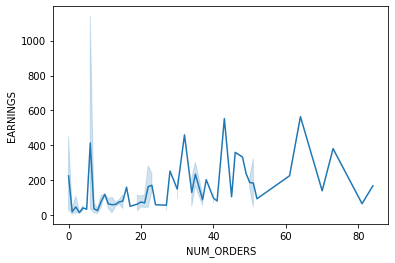

In [ ]:
#Relação entre Earnings e número de pedidos dos entregadores que deram churn

sns.lineplot(data=df_supply_sum_earnings_churns_jul22, x='NUM_ORDERS', y='EARNINGS')

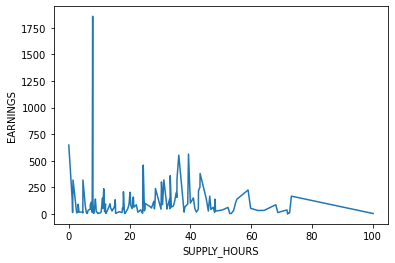

In [ ]:
#Relação entre Earnings e horas ativas dos entregadores que deram churn


sns.lineplot(data=df_supply_sum_earnings_churns_jul22, x='SUPPLY_HOURS', y='EARNINGS')